In [29]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
#from wordcloud import WordCloud
# import seaborn as sns

In [2]:

df = pd.read_csv("clean_data_analyst.csv")

In [3]:
df.head(3)

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Competitors,Easy Apply,City,State,SalaryEstimate_low,SalaryEstimate_high,Revenue_low,Revenue_high
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,-1,TRUE,New York,NY,37000.0,66000.0,100000000.0,500000000.0
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,-1,-1,New York,NY,37000.0,66000.0,2000000.0,5000000.0
2,2,"Senior Data Analyst, Insights & Analytics Team...",We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,GoDaddy,-1,New York,NY,37000.0,66000.0,NaN,NaN


In [4]:
df = df.rename(columns={'Job Title': 'Title'})

In [5]:
df.head(2)

,Unnamed: 0,Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Competitors,Easy Apply,City,State,SalaryEstimate_low,SalaryEstimate_high,Revenue_low,Revenue_high
0,0,"Data Analyst, Center on Immigration and Justic...",Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,-1,TRUE,New York,NY,37000.0,66000.0,100000000.0,500000000.0
1,1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,-1,-1,New York,NY,37000.0,66000.0,2000000.0,5000000.0


In [6]:
df['Location'].value_counts()

New York, NY            310
Chicago, IL             130
San Francisco, CA       119
Austin, TX               81
Los Angeles, CA          80
                       ... 
Fort Sam Houston, TX      1
Queens Village, NY        1
Sandy, UT                 1
Des Plaines, IL           1
Azusa, CA                 1
Name: Location, Length: 253, dtype: int64

In [7]:
df['Easy Apply'].value_counts()

-1      2173
TRUE      80
Name: Easy Apply, dtype: int64

In [8]:
# Easy apply option is not available for most of the companies. It seems like it is an unnecessary column.

In [9]:
df['Competitors'].value_counts()

-1                                                        1732
Robert Half, Insight Global                                 14
Adecco, Manpower                                            14
Artech Information Systems, Mindlance, Tech Mahindra        10
Google, Microsoft, Samsung Electronics                      10
                                                          ... 
Cognizant Technology Solutions, EY, McKinsey & Company       1
Midas, Monro Auto Service and Tire Centers                   1
Converge, Future Electronics, Advanced MP Technology         1
Checkout 51, RetailMeNot, shopkick                           1
Kforce, NTT DATA, IBM                                        1
Name: Competitors, Length: 291, dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'Title', 'Job Description', 'Rating', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Competitors', 'Easy Apply', 'City', 'State',
       'SalaryEstimate_low', 'SalaryEstimate_high', 'Revenue_low',
       'Revenue_high'],
      dtype='object')

In [11]:
for col in df:
    df[col]= df[col].replace('-1', np.nan)
    df[col]= df[col].replace(-1, np.nan)

In [12]:
df['SalaryEstimate_ave']=(df['SalaryEstimate_low']+df['SalaryEstimate_high'])/2

In [13]:
df['Revenue_ave']=(df['Revenue_low']+df['Revenue_high'])/2

In [14]:
df['Comp_Age'] = 2020 - df['Founded']

In [15]:
df["Comp_Age"].unique()

array([ 59., 127.,  17.,  18.,  11.,   6.,  19., 106., 124.,   7., 179.,
        nan, 136.,  16.,   4.,  24.,  62.,  14.,  22.,  51.,   9.,   3.,
        15., 116.,   2.,  64.,  13.,  30.,  97.,   5.,  69.,  39.,  20.,
        54.,  81.,  21., 208.,  75.,  35.,  36.,  58.,  25.,   8.,  53.,
       221., 102.,  72.,  26., 125., 175.,  52.,  12., 109.,  23., 188.,
        86.,  82.,  57.,  28.,  43., 134., 158., 114.,  27.,  85.,  49.,
        31., 161.,  74., 202.,  88., 236., 164.,  42., 108.,  63.,  83.,
        38.,  56., 170.,  37., 151.,  73., 152.,  84., 167.,  10., 118.,
        76., 132., 140.,  47.,  89.,  33.,   1., 101.,  41.,  66.,  40.,
        44., 148.,  94.,  29., 165.,  61.,  34., 130., 138., 137., 183.,
       203., 112.,  32.,  55., 192., 131., 122.,  92., 107., 119., 104.,
       163.,  65.,  71.,  50., 198.,  48., 156.,  45.,  60., 135.,  98.,
       280., 190., 133.,  46., 115.,  67.,  68., 123., 155.,  99., 153.,
        87., 146., 129., 213., 150., 128., 168., 32

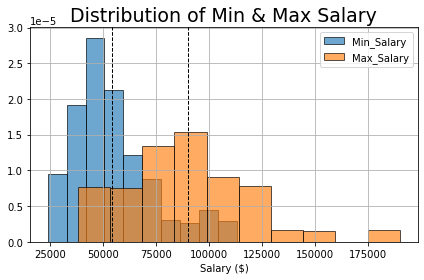

In [16]:
# Salary Histogram

df['SalaryEstimate_low'].hist(density=1, label = "Min_Salary", edgecolor='k', alpha=0.65)
df['SalaryEstimate_high'].hist(density=1, label = "Max_Salary", edgecolor='k', alpha=0.65)

plt.xlabel("Salary ($)")
plt.legend({'Min_Salary':df['SalaryEstimate_low'],'Max_Salary':df['SalaryEstimate_high']})
plt.title("Distribution of Min & Max Salary",fontsize=19)

plt.axvline(df['SalaryEstimate_low'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df['SalaryEstimate_high'].mean(), color='k', linestyle='dashed', linewidth=1)

plt.tight_layout()
plt.savefig("salaryhist.png")
plt.show()


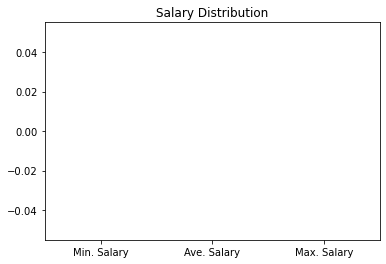

In [17]:

plt.boxplot([df['SalaryEstimate_low'],df['SalaryEstimate_ave'],df['SalaryEstimate_high']], labels=['Min. Salary', 'Ave. Salary', 'Max. Salary'])

plt.title('Salary Distribution')
plt.savefig("salarybox.png")
plt.show()


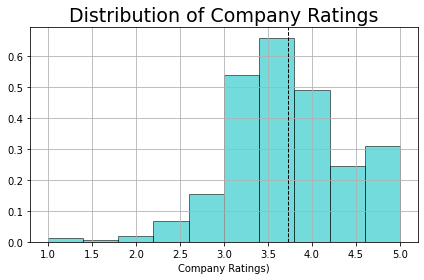

In [18]:
# Company Ratings Histogram

df['Rating'].hist(density=1, label = "Min_Salary",color='c', edgecolor='k', alpha=0.55)

plt.xlabel("Company Ratings)")
plt.title("Distribution of Company Ratings",fontsize=19)

plt.axvline(df['Rating'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.tight_layout()
plt.savefig("rating.png")
plt.show()


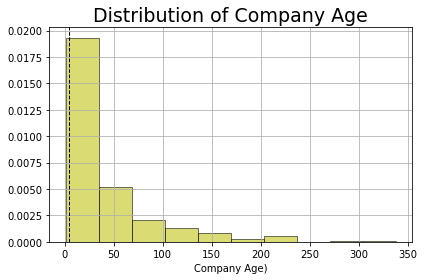

In [19]:
# Company Age Histogram

df['Comp_Age'].hist(density=1, label = "Min_Salary",color='y', edgecolor='k', alpha=0.55)

plt.xlabel("Company Age)")
plt.title("Distribution of Company Age",fontsize=19)

plt.axvline(df['Rating'].mean(), color='k', linestyle='dashed', linewidth=1)


plt.tight_layout()
plt.savefig("age.png")
plt.show()




In [21]:
# Job Locations vs Hiring

Location_count = df.groupby('Location')[['Title']].count().reset_index().sort_values(
    'Title', ascending=False).reset_index(drop=True)

In [22]:
Location_count

,Location,Title
0,"New York, NY",310
1,"Chicago, IL",130
2,"San Francisco, CA",119
3,"Austin, TX",81
4,"Los Angeles, CA",80
...,...,...
248,"Henderson, CO",1
249,"Harrison, NY",1
250,"Hanford, CA",1
251,"Great Neck, NY",1


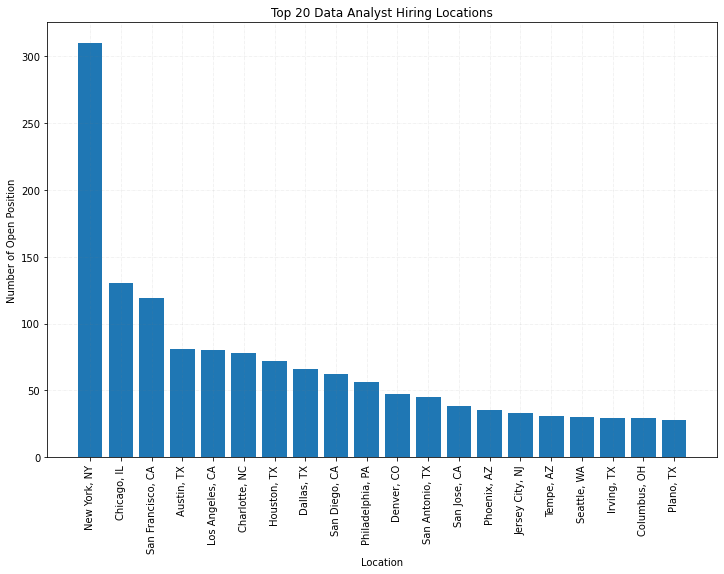

In [41]:
x = Location_count['Location'].head(20)
y = Location_count['Title'].head(20)
fig, ax = plt.subplots(figsize =(12, 8))   
ax.bar(x, y) 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
plt.xticks(rotation=90)
plt.xlabel("Location") 
plt.ylabel("Number of Open Position") 
plt.title("Top 20 Data Analyst Hiring Locations") 
plt.show() 
fig.savefig('hiring.png', dpi=fig.dpi)

In [33]:
df=df.groupby('Location')[['SalaryEstimate_high','SalaryEstimate_low']].mean().sort_values(['SalaryEstimate_high','SalaryEstimate_low'],ascending=False).head(20)

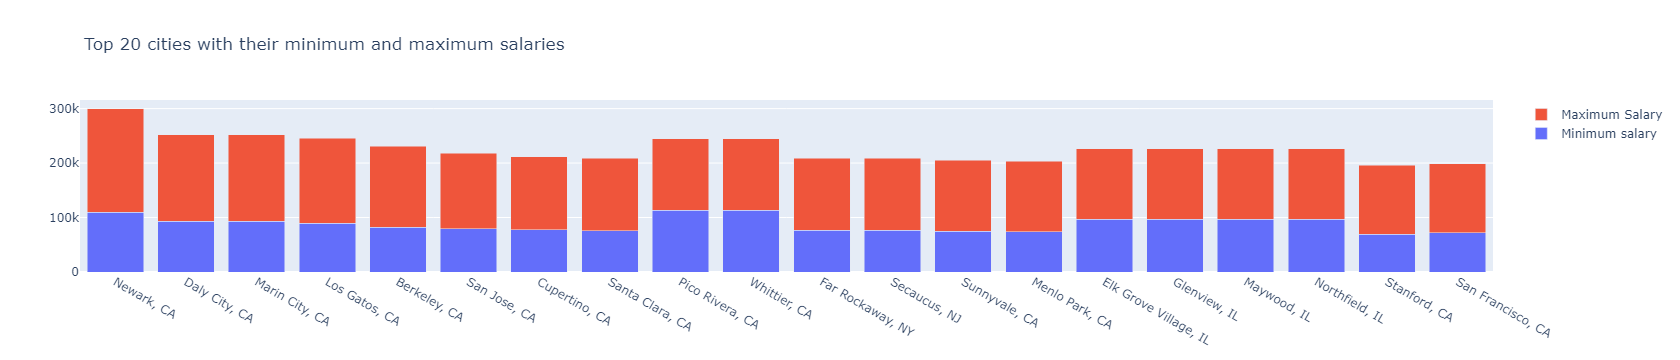

<Figure size 432x288 with 0 Axes>

In [42]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df.index,y=df['SalaryEstimate_low'],name='Minimum salary'))
fig.add_trace(go.Bar(x=df.index,y=df['SalaryEstimate_high'],name='Maximum Salary'))

fig.update_layout(title='Top 20 cities with their minimum and maximum salaries',barmode='stack')

fig.show()
plt.savefig("max_min_salary.png")